Loading BokehJS ...

-----------------Fit results-------------------
Fit of  dataset0  to  linear
Fit parameters:
dataset0_linear_fit0_fitpars_intercept = -0.71 +/- 0.01,
dataset0_linear_fit0_fitpars_slope = 0.697 +/- 0.010

Correlation matrix: 
[[ 1.    -0.986]
 [-0.986  1.   ]]

chi2/ndof = 0.16/6
---------------End fit results----------------

-----------------Fit results-------------------
Fit of  dataset1  to  linear
Fit parameters:
dataset1_linear_fit0_fitpars_intercept = -0.68 +/- 0.01,
dataset1_linear_fit0_fitpars_slope = 0.679 +/- 0.009

Correlation matrix: 
[[ 1.    -0.982]
 [-0.982  1.   ]]

chi2/ndof = 0.21/7
---------------End fit results----------------



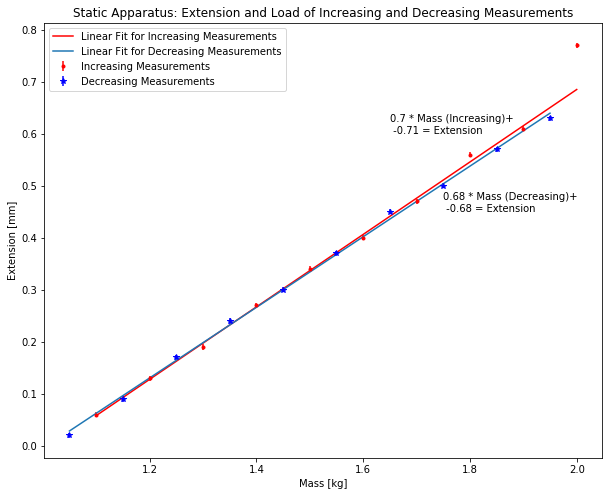

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import qexpy as q

statictable = pd.read_excel('Lab5/staticmethoddata.xlsx')
statictablereverse = pd.read_excel('Lab5/staticreverse.xlsx')
staticdata = statictable.as_matrix()
staticdatareverse = statictablereverse.as_matrix()
zero = 0.170

staticdata[:, 0] += 1
staticdatareverse[:, 0] += 1

staticdata[:,1] -= zero
staticdatareverse[:,1] -= zero

plt.figure(figsize=(10,8))
bincrease, mincrease = q.XYDataSet(xdata=staticdata[:-1,0],
                                   ydata=staticdata[:-1,1],
                                   yerr=0.05).fit("linear")
plt.errorbar(staticdata[:,0],
             staticdata[:,1],
             yerr=0.005,
             fmt='.r',
             label='Increasing Measurements')

bdecrease, mdecrease = q.XYDataSet(xdata=staticdatareverse[:,0],
                                   ydata=staticdatareverse[:,1],
                                   yerr=0.05).fit("linear")
plt.errorbar(staticdatareverse[:,0],
             staticdatareverse[:,1],
             yerr=0.005,
             fmt='*b',
             label='Decreasing Measurements',
             color='blue')

plt.plot(staticdata[:,0],
         staticdata[:,0] * mincrease.get_mean() + bincrease.get_mean(),
         label="Linear Fit for Increasing Measurements",
         color='red')

plt.plot(staticdatareverse[:,0],
         staticdatareverse[:,0] * mdecrease.get_mean() + bdecrease.get_mean(),
         label="Linear Fit for Decreasing Measurements")


plt.text(1.75, 0.45, 
         "{:.2g} * Mass (Decreasing)+\n {:.2g} = Extension".format(mdecrease.get_mean(), bdecrease.get_mean()))
plt.text(1.65, 0.6, 
         "{:.2g} * Mass (Increasing)+\n {:.2g} = Extension".format(mincrease.get_mean(), bincrease.get_mean()))

plt.xlabel('Mass [kg]')
plt.ylabel('Extension [mm]')
plt.title('Static Apparatus: Extension and Load of Increasing and Decreasing Measurements')
plt.legend()
plt.savefig('output/staticgraph.png', bbox_inches='tight')
plt.show()

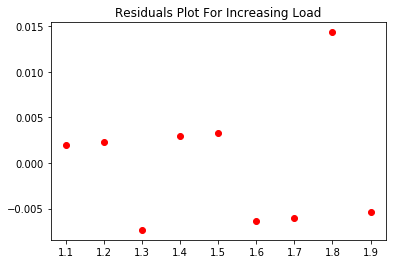

In [2]:
plt.plot(staticdata[:-1,0],
         (staticdata[:-1,1])
         -(staticdata[:-1,0] * mincrease.get_mean() + bincrease.get_mean()),
        'o',
        color='red')
plt.title("Residuals Plot For Increasing Load")
plt.savefig('output/residualsincrease.png', bbox_inches='tight')
plt.show()

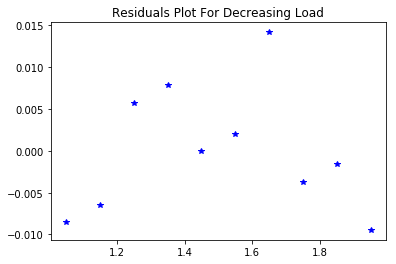

In [3]:
plt.plot(staticdatareverse[:,0],
         (staticdatareverse[:,1])
         -(staticdatareverse[:,0] * mdecrease.get_mean() + bdecrease.get_mean()),
        '*',
        color='blue')

plt.title("Residuals Plot For Decreasing Load")
plt.savefig('output/residualsdecrease.png', bbox_inches='tight')
plt.show()

-----------------Fit results-------------------
Fit of  dataset2  to  linear
Fit parameters:
dataset2_linear_fit0_fitpars_intercept = -0.69 +/- 0.01,
dataset2_linear_fit0_fitpars_slope = 0.686 +/- 0.007

Correlation matrix: 
[[ 1.    -0.984]
 [-0.984  1.   ]]

chi2/ndof = 0.42/16
---------------End fit results----------------



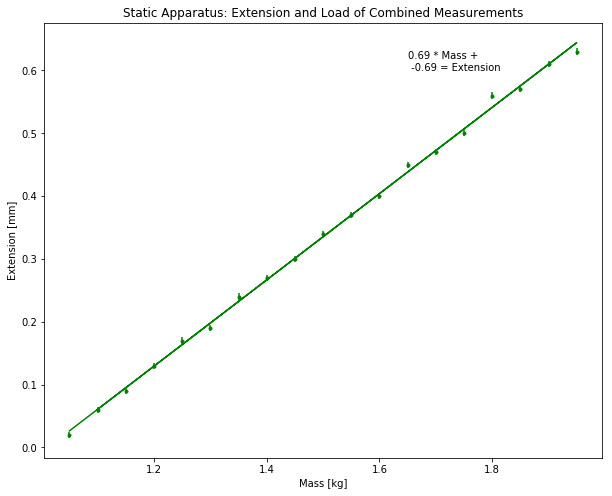

In [4]:
plt.figure(figsize=(10,8))
combined_datax = np.append(staticdata[:-1,0], staticdatareverse[:, 0])
combined_datay = np.append(staticdata[:-1, 1], staticdatareverse[:, 1])

bcombine, mcombine = q.XYDataSet(xdata=combined_datax,
                                 ydata=combined_datay,
                                 yerr=0.05).fit("linear")
plt.errorbar(combined_datax,
             combined_datay,
             yerr=0.005,
             fmt='.g',
             label='Increasing Measurements')
plt.plot(combined_datax,
         combined_datax * mcombine.get_mean() + bcombine.get_mean(),
         label="Linear Fit for Increasing Measurements",
         color='green')

plt.xlabel('Mass [kg]')
plt.ylabel('Extension [mm]')
plt.title('Static Apparatus: Extension and Load of Combined Measurements')
plt.text(1.65, 0.6, 
         "{:.2g} * Mass +\n {:.2g} = Extension".format(mcombine.get_mean(), bcombine.get_mean()))
plt.savefig("output/combinedstaticgraph.png")
plt.show()

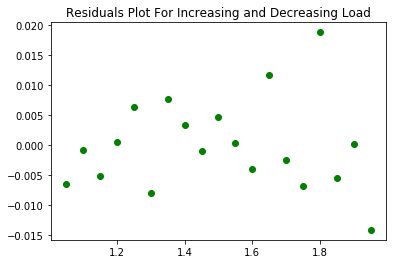

In [5]:
plt.plot(combined_datax,
         combined_datay
         -(combined_datax * mcombine.get_mean() + bcombine.get_mean()),
        'o',
        color='green')
plt.title("Residuals Plot For Increasing and Decreasing Load")
plt.savefig("output/residualscombined.png")
plt.show()

In [6]:
slope = mcombine.get_mean()/1e3

g = 9.81
l1 = 2.83 # Length of Wire
dl1 = 0.01 # Error in Length of Wire
d1 = ((0.51+0.52+0.52)/3)/1e3 # Diameter of Wire in [m]
dd1 = 0.01/1e3 # Error Diameter of Wire in [m]
A = np.pi * (d1/2)**2 # Area of of Wire
E = (1/(slope/g)* l1/A)/1e9

dA = 2*dd1/d1 * A
dE = E*(dl1/l1 + dA/A)
print(E, dE)
dd1*1e3

192.93929366495556 8.15038210785735


0.01

$\frac{F l}{\Delta lA} = (\frac{slope}{g})^{-1} \frac{l}{A}$

In [7]:
Fmax = 2# N
stress = Fmax/A
dstress = dA/A * stress
print("Stress: {:.3g} {:.3g}".format(stress/1e3, dstress/1e3))

dlmax = staticdata[-2,1]/1000

strain = dlmax/l1
dstrain = dl1/l1 * strain
print("Strain: {:.3e} {:.1e}".format(strain, dstrain))


Stress: 9.54e+03 369
Strain: 2.155e-04 7.6e-07


In [8]:
q.set_print_style("Latex")
thickness = q.Measurement(0.78, 0.01, units="mm")/1000
length = q.Measurement(2.81, 0.01)
M = q.Measurement(6.949, 0.001)


dynamictable = pd.read_excel('Lab5/part2freq.xlsx').as_matrix()

periods = (dynamictable[:, 1]/1000)/dynamictable[:, 0]
freqs = 1/periods
freq_err = freqs.std(ddof=1)
freq_avg = freqs.mean()

freq = q.Measurement(freq_avg, freq_err)
print(freq_avg, freq_err)

10.699012305 0.0132082914491


$2\pi f = \sqrt{\frac{EA}{Ml}}$

$E = {(2\pi f_{avg})}^2 Ml/A$


In [9]:
area = np.pi * (thickness/2)**2
Edynamic = (2*np.pi*freq_avg)**2 * M * length/(area)

print(Edynamic.get_mean()/1e9, Edynamic.get_error()/1e9)
print(Edynamic)

184.67013027590298 4.780593526841224
(185 \pm 5)*10^{9}


In [20]:
sensitivity = 400
voltage_avg = dynamictable[:, 2].mean()/2
voltage_err = dynamictable[:, 2].std(ddof=1)

voltage = q.Measurement(voltage_avg, voltage_err)

acceleration = (voltage * 1/sensitivity) * 9.81
T = M * acceleration + M * g
print(voltage)
print(acceleration)
print(T)
print("Stress", T/area/1e3)

(122 \pm 10)
(30 \pm 2)*10^{-1}
(89 \pm 2)
Stress (186 \pm 6)*10^{3}


In [21]:
xo = acceleration/(2*np.pi*freq)**2
print(xo)
print(acceleration, (2*np.pi*freq)**2)

(66 \pm 5)*10^{-5}
(30 \pm 2)*10^{-1} (452 \pm 1)*10^{1}


In [22]:
strain = xo/length
print(strain)

(23 \pm 2)*10^{-5}


In [23]:
qtimes = pd.read_excel("./Lab5/qualityfactor.xlsx").as_matrix()
time_avg = qtimes[1:, 0].mean()
times = q.Measurement(time_avg, 0.5)

Q = np.pi * times * freq/np.log(2)
print(Q)

(62 \pm 2)*10^{1}
